# 1. SVM

- 분류하는데 있어 가장 성능이 좋은 모델
- 수학적 모델을 기반으로 함(이를 이해하려면 수학학 박사과정 수준 정도 되어야)
- 책엔 SVM에 관한 설명 X. 잘들어야해
- 가장 가까운 두 점의 거리가 가장 멀게 선을 그려 데이터를 구분(SVC)하거나 인과관계(SVR) 정도를 설명함
- 클래스 사이의 경계에 위치한 데이터 포인터를 서포트 벡터라고 한다.
- 각 서포트 벡터가 클래스(분류 데이터 의미, Yes or No // 0 or 1) 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 학습
- 각 서포트 벡터의 거리와 마진이 가장 큰 방향으로 학습
- 서포트 벡터까지의 거리와 서포트 벡터의 중요도를 기반으로 예측을 수행
- 그래서, 많은 양의 데이터를 필요로 하지 않음
- 심플한 방법으로 보이나, 겁나 어려운 이유 ::
- 2차원 면에서 1차원선으로 데이터를 구분하지 못하는 경우, 차원을 늘려 입체적으로 분류 면(초평면, Hyper Plane)을 그려 분석함(이게 엄청 복잡)

+ 관련 클래스
    * 회귀, 분류 : SVR(회귀), SVC(분류) -- 분류 쪽에 더 강한 성능을 보임. 회귀모델은 선형회귀모델을 사용하는 것이 기본
    * 선형, 비선형 : [선형] : LinearSVC, LinearSVR // [비선형] KernelSVC, KernelSVR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').get_name()
plt.rc("font", family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import requests as req
import time
import re

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV # 데이터 나누기, 점검 및 훈련

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score # 평가지표
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler # Feature Scaling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import load_iris, load_boston, load_breast_cancer, make_moons, load_digits, load_diabetes, load_wine # 데이터
import mglearn # 그래프

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC

#### DecisionTree 관련
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # decisiontree에서 파생된 분류 알고리즘들
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import export_graphviz # 파이썬과 graphviz를 연동해준다

# conda install -c conda -py
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

from sklearn.pipeline import make_pipeline
import multiprocessing
from sklearn.pipeline import Pipeline

# pip install lightgbm
# conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_tree, plot_metric

import graphviz

import statsmodels.api as sm

In [5]:
# SVC는 분류, SVR은 회귀
# 분류알고리즘에선 끝판왕으로 불림
from sklearn.svm import SVR, SVC

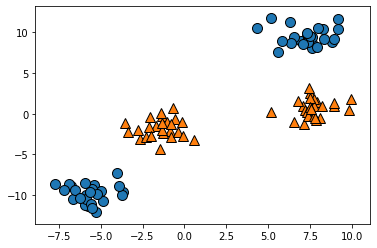

In [6]:
X, y = mglearn.datasets.make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [8]:
linear_svm = LinearSVC().fit(X, y)

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


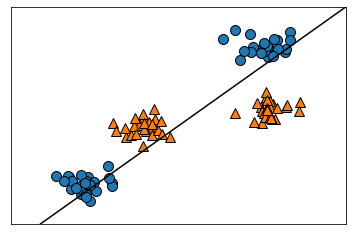

In [9]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(linear_svm, X)

In [10]:
X_new = np.hstack([X, (X[:, 1:]**2)])
X_new

array([[-1.72161036e+00, -1.48033142e+00,  2.19138111e+00],
       [-3.65733840e+00, -9.54823830e+00,  9.11688546e+01],
       [ 7.07781630e+00,  9.95087718e-01,  9.90199567e-01],
       [-1.36579859e+00, -3.14862498e-01,  9.91383928e-02],
       [-2.66521206e+00, -3.12591651e+00,  9.77135405e+00],
       [ 7.63027116e+00,  8.69797933e+00,  7.56548444e+01],
       [-5.27144331e+00, -1.21188070e+01,  1.46865483e+02],
       [ 7.91767139e+00,  1.41547387e+00,  2.00356628e+00],
       [-1.41284184e+00,  1.12963480e-01,  1.27607478e-02],
       [-1.01519039e+00, -1.03318203e+00,  1.06746511e+00],
       [ 8.26341570e+00,  1.03472344e+01,  1.07065259e+02],
       [ 6.96767867e+00,  8.96225230e+00,  8.03219662e+01],
       [-8.47792492e-01, -2.12185612e+00,  4.50227339e+00],
       [ 7.48006237e+00,  2.49392925e+00,  6.21968311e+00],
       [ 7.71454967e+00,  1.84207010e+00,  3.39322225e+00],
       [-7.74064658e+00, -8.61800744e+00,  7.42700522e+01],
       [-5.41087235e+00, -8.71941280e+00

In [11]:
# 3차원으로 보여줄 그래프 하나 준비
# 별도의 프로그램 필요

from mpl_toolkits.mplot3d import Axes3D, axes3d

/var/folders/dx/ny9cjsmd1bb3r42zbp694xkh0000gn/T/ipykernel_1302/4268646118.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, '특성 1**2')

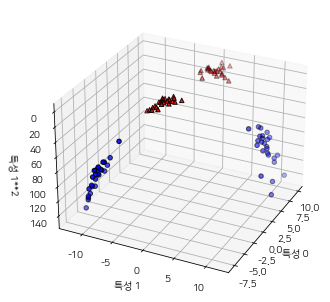

In [17]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

mask = (y == 0)
# 개입연산자, 대입연산자
# mask는 y값이 0인 값만 True, 아닌 것은 False로 나타나게 된다.

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c="b", cmap=mglearn.cm2, edgecolor="k")
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c="r", cmap=mglearn.cm2, edgecolor="k", marker = "^")

ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1**2")

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/var/folders/dx/ny9cjsmd1bb3r42zbp694xkh0000gn/T/ipykernel_1302/1622732506.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, '특성1 ** 2')

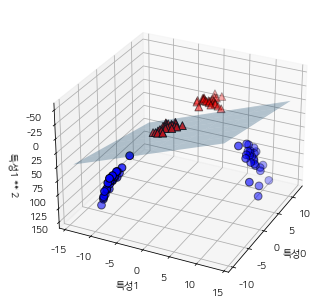

In [18]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

# Kernel 방식 : 다항식 // 가우스식 발싱

Text(0, 0.5, '특성 1')

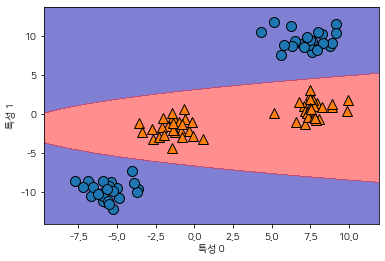

In [19]:
#### 3차원 그래프를 평면으로 옮기면 이렇게 된다.

ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]) #ravel은 3차원을 2차원, 혹은 1차원으로 내릴 때 쓰는 명령어
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## 2. SVM 하이퍼 파라미터

+ cost
    - decision boundary와 마진의 간격을 어느 정도로 할지 결정
    - cost가 작으면 마진은 넓어진다.

+  gamma
    - 훈련 데이터 하나 당 영향을 끼치는 범위를 조절하는 변수
    - gamma가 작을수록 영향을 끼치는 범위가 넓어진다.

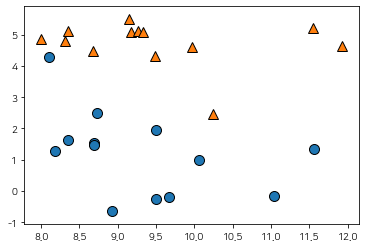

In [21]:
X, y = mglearn.tools.make_handcrafted_dataset()

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [22]:
svm=SVC(kernel="rbf", C=10, gamma=0.1).fit(X,y)

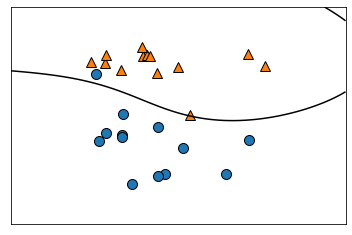

In [23]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

In [27]:
#### 서포트벡터 데이터는 무엇인지 확인해볼 수 있다.

sv = svm.support_vectors_

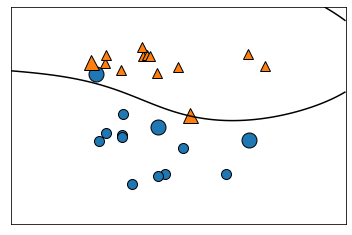

In [28]:
#### 그래프 상에 올려서 나타내보기

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X)

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s = 15)

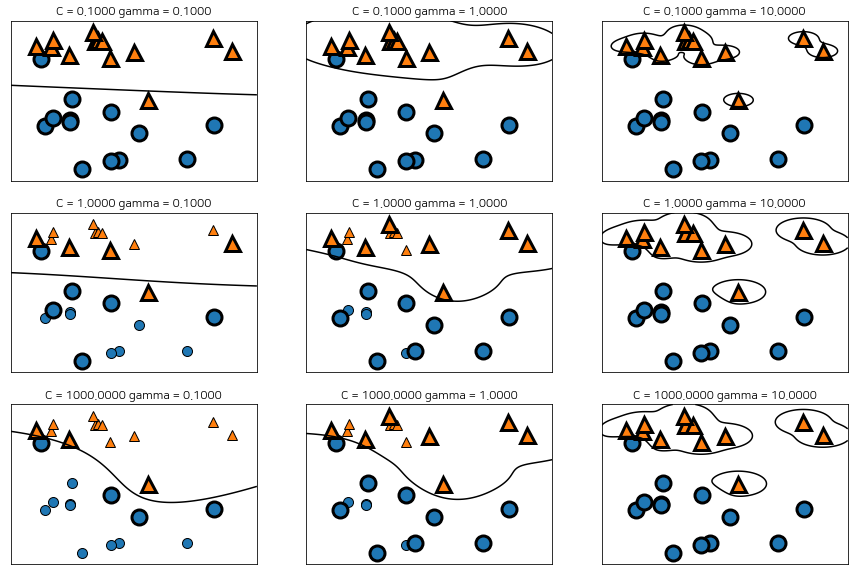

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax=a)

## SVM 종류

- 분류 vs 회귀

### 1. 회귀모델

In [30]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [31]:
model = SVR()
model.fit(X_train, y_train)

print("훈련 결과 : {}".format(model.score(X_train, y_train)))
print("점검 결과 : {}".format(model.score(X_test, y_test)))
#### 설명력 똥
#### 회귀 분석은 선형 회귀분석이 짱임


훈련 결과 : 0.2177283706374875
점검 결과 : 0.13544178468518187


### 2. 분류모델

In [34]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=123)

In [35]:
model = SVC()
model.fit(X_train, y_train)

print("훈련 결과 : {}".format(model.score(X_train, y_train)))
print("점검 결과 : {}".format(model.score(X_test, y_test)))
# 전처리, 그 중에서도 Scaling에 엄청 민감함.

훈련 결과 : 0.9014084507042254
점검 결과 : 0.9230769230769231


### 3. 커널기법
+ 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
+ scikit-learn에서는 Linear(X), Polynomial, RBF(Radial Basis Function) - '인공신경망 문제 해결에 초석이 됨' 등 다양한 커널 기법을 지원

#### 회귀

In [36]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=123)

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [40]:
#### linear
linear_svr = SVR(kernel="linear")
linear_svr.fit(X_train, y_train)

print("훈련 결과 : {}".format(linear_svr.score(X_train, y_train)))
print("점검 결과 : {}".format(linear_svr.score(X_test, y_test)))

훈련 결과 : 0.715506620496448
점검 결과 : 0.6380398541506058


In [39]:
#polynomial
poly_svr = SVR(kernel="poly")
poly_svr.fit(X_train, y_train)

print("훈련 결과 : {}".format(poly_svr.score(X_train, y_train)))
print("점검 결과 : {}".format(poly_svr.score(X_test, y_test)))

훈련 결과 : 0.2024454261446289
점검 결과 : 0.133668450367462


In [41]:
rbf_svr = SVR(kernel="rbf")
rbf_svr.fit(X_train, y_train)

print("훈련 결과 : {}".format(rbf_svr.score(X_train, y_train)))
print("점검 결과 : {}".format(rbf_svr.score(X_test, y_test)))

훈련 결과 : 0.2177283706374875
점검 결과 : 0.13544178468518187


In [42]:
#### 성적이 왜 이렇게 구리냐?
#### -> polynominal 과 rbf 방식은 분류를 위한 모델(결과변수가 명목변수여야한단 의미다.)
#### -> SVR은 결과변수가 연속변수에 적합. 따라서 맞지 않을 수 밖에

#### 분류

In [44]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=123)

In [45]:
#### linear
linear_svc = SVC(kernel="linear")
linear_svc.fit(X_train, y_train)

print("훈련 결과 : {}".format(linear_svc.score(X_train, y_train)))
print("점검 결과 : {}".format(linear_svc.score(X_test, y_test)))

훈련 결과 : 0.960093896713615
점검 결과 : 0.986013986013986


In [46]:
#polynomial
poly_svc = SVC(kernel="poly")
poly_svc.fit(X_train, y_train)

print("훈련 결과 : {}".format(poly_svc.score(X_train, y_train)))
print("점검 결과 : {}".format(poly_svc.score(X_test, y_test)))

훈련 결과 : 0.9014084507042254
점검 결과 : 0.9230769230769231


In [47]:
rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(X_train, y_train)

print("훈련 결과 : {}".format(rbf_svc.score(X_train, y_train)))
print("점검 결과 : {}".format(rbf_svc.score(X_test, y_test)))

훈련 결과 : 0.9014084507042254
점검 결과 : 0.9230769230769231


#### 하이퍼 파라미터 튜닝

In [50]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [52]:
##### polynomial 기법 사용

polynomial_svc = SVC(kernel='poly', C=0.1, gamma='auto')
polynomial_svc.fit(X_train, y_train)

print("kernel=poly, C={}, gamma={}".format(0.1, "auto"))
print("polynomial 학습결과 : ", polynomial_svc.score(X_train, y_train))
print("polynomial 학습결과 : ", polynomial_svc.score(X_test, y_test))

kernel=poly, C=0.1, gamma=auto
polynomial 학습결과 :  0.971830985915493
polynomial 학습결과 :  0.986013986013986


In [53]:
##### rbf 기법 사용

# gamma인자에서 scale은 오차범위를 줄이는 스케일을 해서 적용한다는 의미. 머신러닝은 다해봐야함 ㅠ
rbf_svc = SVC(kernel='rbf', C=10, gamma='scale')
rbf_svc.fit(X_train, y_train)

print("kernel=poly, C={}, gamma={}".format(0.1, "scale"))
print("polynomial 학습결과 : ", rbf_svc.score(X_train, y_train))
print("polynomial 학습결과 : ", rbf_svc.score(X_test, y_test))

kernel=poly, C=0.1, gamma=auto
polynomial 학습결과 :  0.92018779342723
polynomial 학습결과 :  0.9300699300699301


### 4. 데이터 전처리
- SVM는 전처리 중에서도 정규화에 매우 민감함
- 반드시 데이터 정규화 필요하다.
- StandardScaler, MinMaxScaler

In [ ]:
# MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
iris_scaled = scaler.transform(df)

df_scaled = pd.DataFrame(iris_scaled, columns=iris.feature_names)
df_scaled

scaler = MinMaxScaler()
scaler.fit(train_data)
train_scale = scaler.transform(train_data)

print("원본:", train_data.reshape(-1))
print("수정:", train_scale.reshape(-1))

## 테스트 데이터도 스케일링 해줘야한다.
## 그런데, 여기서 문제 발생한다.
## 같은 비율로 적용되어야 하는데 자체적으로 하면 그렇지 못함

# scaler.fit(test_data) 이걸 하지 않으면 된다. fit에 비율이 적용됨. 그러니 fit을 하지 않고 transform에 바로 test_data를 넘겨준다.
test_scale = scaler.transform(test_data)
print("원본:", test_data.reshape(-1))
print("수정:", test_scale.reshape(-1))

In [ ]:
# StandardScaler

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(df)
iris_scaled= std.transform(df)
#### fit_transform(X_train)
#### transform(X_test)

# 데이터프레임으로
iris_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)
iris_scaled

In [54]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=123)

In [55]:
model = SVC()
model.fit(X_train, y_train)

print("훈련 결과 : {}".format(model.score(X_train, y_train)))
print("점검 결과 : {}".format(model.score(X_test, y_test)))

훈련 결과 : 0.9014084507042254
점검 결과 : 0.9230769230769231


In [56]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

model = SVC()
model.fit(X_train_std, y_train)

print("훈련 결과 : {}".format(model.score(X_train_std, y_train)))
print("점검 결과 : {}".format(model.score(X_test_std, y_test)))

훈련 결과 : 0.9835680751173709
점검 결과 : 0.986013986013986


In [57]:
mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.transform(X_test)

model = SVC()
model.fit(X_train_mm, y_train)

print("훈련 결과 : {}".format(model.score(X_train_mm, y_train)))
print("점검 결과 : {}".format(model.score(X_test_mm, y_test)))

훈련 결과 : 0.9812206572769953
점검 결과 : 0.986013986013986


In [59]:
min = X_train.min(axis=0)
range = (X_train - min).max(axis=0)

X_train_cus = (X_train - min) / range
X_test_cus = (X_test-min) / range

model = SVC()
model.fit(X_train_cus, y_train)

print("훈련 결과 : {}".format(model.score(X_train_cus, y_train)))
print("점검 결과 : {}".format(model.score(X_test_cus, y_test)))

훈련 결과 : 0.9812206572769953
점검 결과 : 0.986013986013986


## 5. LinearSVR

### sample 1. boston housing

In [48]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [49]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train_std = scalar.transform(X_train)
X_test_std = scalar.transform(X_test)

In [50]:
sv_model = SVR(kernel='linear')

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train_std.shape)
print(X_test_std.shape)

(404, 13)
(404,)
(102, 13)
(102,)
(404, 13)
(102, 13)


In [52]:
sv_model.fit(X_train_std, y_train)

SVR(kernel='linear')

In [54]:
print("훈련 결과 : {}".format(sv_model.score(X_train_std, y_train)))
print("점검 결과 : {}".format(sv_model.score(X_test_std, y_test)))

#### 머신러닝에선 변수들을 Feature, Field라고 함

훈련 결과 : 0.6964500689230828
점검 결과 : 0.7432378136001323


In [36]:
#### 차원축소(TSNE)
from sklearn.manifold import TSNE
X_comp = TSNE(n_components = 1).fit_transform(X)
X_comp

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-1.22372961e+01],
       [-3.71004715e+01],
       [-3.49867592e+01],
       [-3.43060417e+01],
       [-3.49240913e+01],
       [-3.51757202e+01],
       [-6.84190464e+00],
       [-2.02932358e+00],
       [-1.66197801e+00],
       [-2.04045200e+00],
       [-1.96899819e+00],
       [-2.32019091e+00],
       [-8.75968456e+00],
       [-7.00617838e+00],
       [-3.49602747e+00],
       [-7.30676699e+00],
       [-9.51538658e+00],
       [-3.54062724e+00],
       [ 1.25675082e+00],
       [-6.05989027e+00],
       [-1.40623415e+00],
       [-2.95392752e+00],
       [-2.64567614e+00],
       [-2.28283262e+00],
       [-2.60631680e+00],
       [ 1.13691843e+00],
       [-1.78707671e+00],
       [ 1.11595178e+00],
       [-2.58858824e+00],
       [-2.96991825e+00],
       [-9.27029788e-01],
       [-1.45338511e+00],
       [ 1.46097159e+00],
       [-9.13300335e-01],
       [ 1.40764558e+00],
       [-1.95097370e+01],
       [-1.73568211e+01],
       [-1.53213215e+01],
       [-1.4

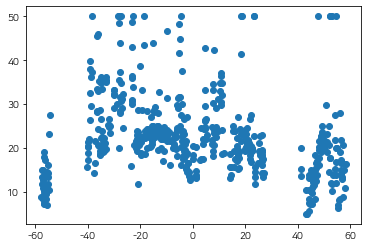

In [37]:
plt.scatter(X_comp, y)

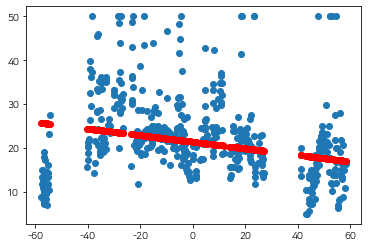

In [56]:
sv_model.fit(X_comp, y)

predict = sv_model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

# 차원축소는 불필요한 피쳐들 제거해야할 때 간편하게 할 수 있는 방법
# 회귀보단 분류에서 조금 더 힘을 발휘함

In [63]:
# fit과 transform을 일일이 지정할 필요없이 pipeline으로 연결해주면 자동으로 fit과 transform을 해준다.
from sklearn.pipeline import make_pipeline
import multiprocessing

est = make_pipeline(StandardScaler(), SVR(kernel="linear"))
cross_validate(estimator=est, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.7s finished


{'fit_time': array([0.01540089, 0.00896263, 0.00842214, 0.00852203, 0.00852919]),
 'score_time': array([0.0016923 , 0.00131106, 0.00114369, 0.00198984, 0.00107288]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [65]:
#### GridsearchCV

pipe = make_pipeline(StandardScaler(), SVR(kernel="linear"))
params = [{"model__gamma":['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01], "model__epsilon":[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=5)

gs.fit(X, y)
# 오류. make_pipeline말고 Pipeline 써서 넘겨달라고 함

Fitting 5 folds for each of 18 candidates, totalling 90 fits


ValueError: Invalid parameter model for estimator Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(kernel='linear'))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [67]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('standardscaler', StandardScaler()), ("model", SVR(kernel="linear"))])
params = [{"model__gamma":['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01], "model__epsilon":[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=5)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [70]:
print(gs.best_params_)
print(gs.best_estimator_)
print(gs.best_score_)

{'model__C': 0.1, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=1.0, kernel='linear'))])
0.49854468515517


In [72]:
model = SVR(kernel='linear', C=0.1, gamma='scale', epsilon=1.0)
model.fit(X_train, y_train)

print("훈련 결과 : {}".format(model.score(X_train, y_train)))
print("점검 결과 : {}".format(model.score(X_test, y_test)))


훈련 결과 : 0.6887854049569857
점검 결과 : 0.6971882403652723


### 당뇨병 샘플
- 의사결정나무 알고리즘 내 XGBOOST에서 해봄. 95/30으로 엄청난 overfit 경험한 샘플

In [92]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=.2)

In [94]:
### 전처리 & 훈련
scalar = StandardScaler()
scalar.fit(X_train)
X_train_std = scalar.transform(X_train)
X_test_std = scalar.transform(X_test)

model = SVR(kernel="linear")
model.fit(X_train_std, y_train)

print("훈련 결과 : {}".format(model.score(X_train_std, y_train)))
print("점검 결과 : {}".format(model.score(X_test_std, y_test)))

훈련 결과 : 0.492458871681117
점검 결과 : 0.5570136940699909


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


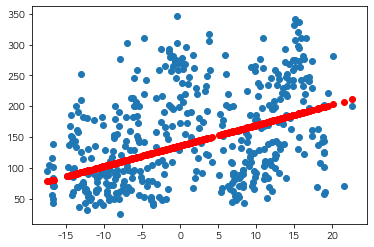

In [95]:
# 차원축소
X_comp = TSNE(n_components = 1).fit_transform(X)
X_comp
model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [96]:
est = make_pipeline(StandardScaler(), SVR(kernel="linear"))
cross_validate(estimator=est, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.6s finished


{'fit_time': array([0.00977588, 0.00474501, 0.00553393, 0.00500512, 0.00567985]),
 'score_time': array([0.00140405, 0.0009253 , 0.00326133, 0.00101495, 0.00108886]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [89]:
pipe = Pipeline([('standardscaler', StandardScaler()), ("model", SVR(kernel="linear"))])
params = [{"model__gamma":['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01], "model__epsilon":[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=5)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [97]:
print(gs.best_params_)
print(gs.best_score_)

{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'scale'}
0.4780769992158147


In [99]:
model = SVR(kernel='linear', C=1.0, gamma='scale', epsilon=1.0)
model.fit(X_train_std, y_train)

print("훈련 결과 : {}".format(model.score(X_train_std, y_train)))
print("점검 결과 : {}".format(model.score(X_test_std, y_test)))

훈련 결과 : 0.49306502223681103
점검 결과 : 0.556398299090571


## 6. 비선형방식

### sample 1. boston housing

In [100]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 123)

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [103]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train_std = scalar.transform(X_train)
X_test_std = scalar.transform(X_test)

sv_model = SVR(kernel='rbf')
sv_model.fit(X_train_std, y_train)

print("훈련 결과 : {}".format(sv_model.score(X_train_std, y_train)))
print("점검 결과 : {}".format(sv_model.score(X_test_std, y_test)))

훈련 결과 : 0.6804558691341751
점검 결과 : 0.5895829313193316


In [104]:
#### 차원축소(TSNE)
from sklearn.manifold import TSNE
X_comp = TSNE(n_components = 1).fit_transform(X)
X_comp

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 19.679369  ],
       [ 45.016144  ],
       [ 41.27981   ],
       [ 42.221714  ],
       [ 42.48372   ],
       [ 42.641037  ],
       [ 12.878787  ],
       [  8.169526  ],
       [  7.806886  ],
       [  8.180407  ],
       [  8.1109    ],
       [  8.473811  ],
       [ 17.61786   ],
       [ 13.037229  ],
       [  9.5986185 ],
       [ 13.313362  ],
       [ 17.2003    ],
       [  9.652132  ],
       [  5.136803  ],
       [ 12.130805  ],
       [  7.577464  ],
       [  9.08529   ],
       [  8.774701  ],
       [  8.414262  ],
       [  8.735795  ],
       [  5.251808  ],
       [  7.943664  ],
       [  5.2702723 ],
       [  8.715684  ],
       [  9.095826  ],
       [  7.112439  ],
       [  7.626988  ],
       [  4.9537992 ],
       [  7.102428  ],
       [  5.003419  ],
       [ 26.948349  ],
       [ 24.760923  ],
       [ 22.734262  ],
       [ 22.077745  ],
       [ 34.957806  ],
       [ 34.91414   ],
       [ 39.735     ],
       [ 39.76531   ],
       [ 39

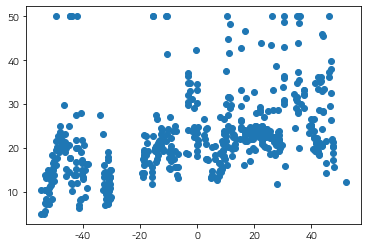

In [105]:
plt.scatter(X_comp, y)

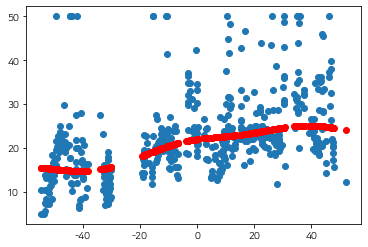

In [106]:
sv_model.fit(X_comp, y)

predict = sv_model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

# 차원축소는 불필요한 피쳐들 제거해야할 때 간편하게 할 수 있는 방법
# 회귀보단 분류에서 조금 더 힘을 발휘함

In [107]:
# fit과 transform을 일일이 지정할 필요없이 pipeline으로 연결해주면 자동으로 fit과 transform을 해준다.
from sklearn.pipeline import make_pipeline
import multiprocessing
from sklearn.pipeline import Pipeline

est = make_pipeline(StandardScaler(), SVR(kernel="rbf"))
cross_validate(estimator=est, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.1s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.7s finished


{'fit_time': array([0.00811887, 0.00782514, 0.00773525, 0.007725  , 0.014539  ]),
 'score_time': array([0.00420594, 0.00391865, 0.00391698, 0.01125813, 0.00457311]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [108]:
cv = cross_validate(estimator=est, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)
print("cross validation 평균 : ", cv['test_score'].mean())

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s


cross validation 평균 :  0.17631266230186618


[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.3s finished


In [110]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('standardscaler', StandardScaler()), ("model", SVR(kernel="rbf"))])
params = [{"model__kernel":['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=5)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklear

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [111]:
print(gs.best_params_)
print(gs.best_estimator_)

{'model__kernel': 'rbf'}
Pipeline(steps=[('standardscaler', StandardScaler()), ('model', SVR())])


In [112]:
pipe = Pipeline([('standardscaler', StandardScaler()), ("model", SVR(kernel="rbf"))])
params = [{"model__gamma":['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01], "model__epsilon":[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=5)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [116]:
print("최적의 파라미터 : ", gs.best_params_)
print(gs.best_estimator_)
print("최적 파라미터 설명력 : ", gs.best_score_)

최적의 파라미터 :  {'model__C': 1.0, 'model__epsilon': 0.01, 'model__gamma': 'scale'}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model', SVR(epsilon=0.01))])
최적 파라미터 설명력 :  0.1780747543330848


In [115]:
model = SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.01)
model.fit(X_train_std, y_train)

print("훈련 결과 : {}".format(model.score(X_train_std, y_train)))
print("점검 결과 : {}".format(model.score(X_test_std, y_test)))


훈련 결과 : 0.6807135712191221
점검 결과 : 0.5902108703816756


### sample 2. diabets

In [117]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=.2)

In [118]:
### 전처리 & 훈련
scalar = StandardScaler()
scalar.fit(X_train)
X_train_std = scalar.transform(X_train)
X_test_std = scalar.transform(X_test)

model = SVR(kernel="rbf")
model.fit(X_train_std, y_train)

print("훈련 결과 : {}".format(model.score(X_train_std, y_train)))
print("점검 결과 : {}".format(model.score(X_test_std, y_test)))

훈련 결과 : 0.15345164466149963
점검 결과 : 0.1809671882441687


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


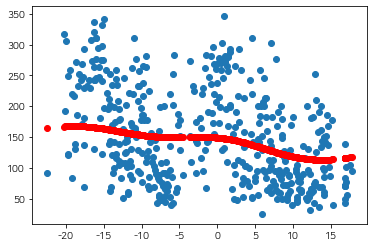

In [119]:
# 차원축소
X_comp = TSNE(n_components = 1).fit_transform(X)
X_comp
model.fit(X_comp, y)

predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [120]:
est = make_pipeline(StandardScaler(), SVR(kernel="rbf"))
cross_validate(estimator=est, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.7s finished


{'fit_time': array([0.0057838 , 0.00573897, 0.01722121, 0.00583124, 0.00573683]),
 'score_time': array([0.00329804, 0.00317621, 0.00447893, 0.00315499, 0.00308418]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [125]:
pipe = Pipeline([('standardscaler', StandardScaler()), ("model", SVR(kernel="rbf"))])
params = [{"model__kernel":['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=5)

gs.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklear

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=8,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [126]:
print(gs.best_params_)

{'model__kernel': 'sigmoid'}


In [127]:
pipe = Pipeline([('standardscaler', StandardScaler()), ("model", SVR(kernel="sigmoid"))])
params = [{"model__gamma":['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01], "model__epsilon":[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=5)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=8,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [128]:
print(gs.best_params_)
print(gs.best_score_)

{'model__C': 1.0, 'model__epsilon': 1.0, 'model__gamma': 'auto'}
0.35001409316735377


In [130]:
model = SVR(kernel='sigmoid', C=1.0, gamma='auto', epsilon=1.0)
model.fit(X_train_std, y_train)

print("훈련 결과 : {}".format(model.score(X_train_std, y_train)))
print("점검 결과 : {}".format(model.score(X_test_std, y_test)))

훈련 결과 : 0.3726520070304975
점검 결과 : 0.3905617056363221


## 7. LinearSVC

### 유방암 데이터

In [133]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

model = SVC(kernel="linear")
model.fit(X_train, y_train)

print("훈련 결과 : {}".format(model.score(X_train, y_train)))
print("점검 결과 : {}".format(model.score(X_test, y_test)))

훈련 결과 : 0.9906103286384976
점검 결과 : 0.986013986013986


In [134]:
#### cross validate
est = make_pipeline(StandardScaler(), SVC(kernel="linear"))
cross_validate(estimator=est, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.8s remaining:    1.1s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.8s finished


{'fit_time': array([0.00369501, 0.00465608, 0.00403476, 0.00304222, 0.00313711]),
 'score_time': array([0.00050998, 0.00145388, 0.00056696, 0.00061989, 0.00055671]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [135]:
cv = cross_validate(estimator=est, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)
print("평균 : ", cv['test_score'].mean())

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s


평균 :  0.9718987734823784


[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.3s finished


In [139]:
#### GridsearchCV

pipe = Pipeline([('standardscaler', StandardScaler()), ("model", SVC(kernel="linear"))])
params = [{"model__gamma":['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=5)

gs.fit(X, y)

print(gs.best_params_)
print(gs.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'model__C': 0.1, 'model__gamma': 'scale'}
0.9736531594472908


In [137]:
SVC(kernel='linear').get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [140]:
model = SVC(kernel='linear', C=0.1, gamma='scale')
model.fit(X_train, y_train)

print("훈련 결과 : {}".format(model.score(X_train, y_train)))
print("점검 결과 : {}".format(model.score(X_test, y_test)))

훈련 결과 : 0.9788732394366197
점검 결과 : 0.993006993006993


### 붓꽃 데이터

In [6]:
#### 붓꽃 데이터

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

model = SVC(kernel="linear")
model.fit(X_train, y_train)

print("훈련 결과 : {}".format(model.score(X_train, y_train)))
print("점검 결과 : {}".format(model.score(X_test, y_test)))

훈련 결과 : 0.9910714285714286
점검 결과 : 0.9736842105263158


In [7]:
est = make_pipeline(StandardScaler(), SVC(kernel="linear"))
cross_validate(estimator=est, X=X, y=y, cv=5, n_jobs=multiprocessing.cpu_count(), verbose=True)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.0s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.7s finished


{'fit_time': array([0.001194  , 0.00129199, 0.00120711, 0.00125909, 0.00218606]),
 'score_time': array([0.00028205, 0.00028205, 0.00028515, 0.00028586, 0.00035477]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [8]:
#### GridsearchCV

pipe = Pipeline([('standardscaler', StandardScaler()), ("model", SVC(kernel="linear"))])
params = [{"model__gamma":['scale', 'auto'], 'model__C':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(estimator=pipe, param_grid=params, n_jobs=multiprocessing.cpu_count(), verbose=True, cv=5)

gs.fit(X, y)

print(gs.best_params_)
print(gs.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'model__C': 1.0, 'model__gamma': 'scale'}
0.9666666666666668


In [9]:
model = SVC(kernel='linear', C=1.0, gamma='scale')
model.fit(X_train, y_train)

print("훈련 결과 : {}".format(model.score(X_train, y_train)))
print("점검 결과 : {}".format(model.score(X_test, y_test)))

훈련 결과 : 0.9910714285714286
점검 결과 : 0.9736842105263158


### 와인 데이터

In [ ]:
#### 와인 데이터



## 8. KernelSVC
- breast cancer sample
- iris sample
- wine sample

## 9. 예졔
- 농구 포지션 분류하기
- 손글씨 분류하기

#### 1) 농구포지션분류

In [28]:
#### 예제

df=pd.read_csv("data/basketball_stat.csv")
df

# target = df['Pos']
# data = df.iloc[:, 2:]

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


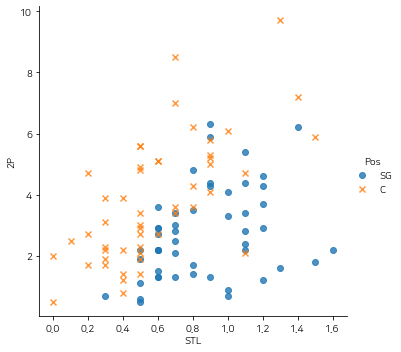

In [29]:
sns.lmplot("STL", "2P", data=df, fit_reg=False, hue='Pos', markers=["o", "x"])

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


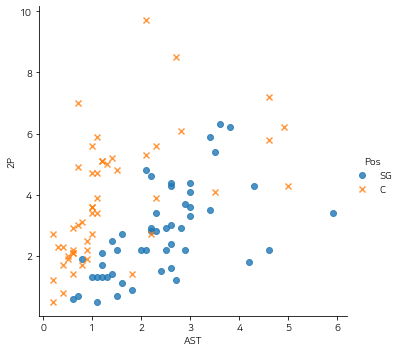

In [30]:
sns.lmplot("AST", "2P", data=df, fit_reg=False, hue='Pos', markers=["o", "x"])

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


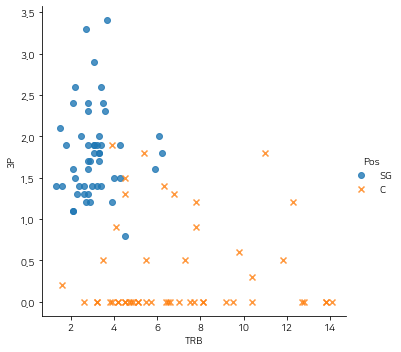

In [31]:
sns.lmplot("TRB", "3P", data=df, fit_reg=False, hue='Pos', markers=["o", "x"])

In [32]:
df.drop(["2P", "AST", "STL"], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [33]:
train, test = train_test_split(df, test_size=.2)
print(train.shape, test.shape)

(80, 5) (20, 5)


In [34]:
X_train = train[["3P", "TRB", "BLK"]]
y_train = train['Pos']

In [35]:
params = [{"kernel" : ["rbf", "poly", "sigmoid"]}, {"gamma" : ["scale", "auto"]}, {"C" : [0.01, 0.1, 1, 10, 100 ,1000]}]

svm = GridSearchCV(SVC(), params).fit(X_train, y_train)

In [36]:
svm.best_params_

{'gamma': 'auto'}

In [37]:
X_test = test[["3P", "TRB", "BLK"]]
y_test = test['Pos']

In [38]:
pred = svm.predict(X_test)

accuracy_score(y_test, pred)

0.95

#### 2) 손글씨 분류

In [40]:
def load_csv(fname):
    labels = []
    images = []

    f = open(fname, "r")
    for line in f:
        cols = line.split(",")

        if len(cols) < 2: #빈줄도 1로 쳐진다. 그래서, 2보다 크거나 같은 것은 빈칸값이 포함된 것이라 볼 수 있다.
            continue
        
        labels.append(int(cols.pop(0))) #pop는 데이터를 뽑아오고 뽑아온 데이터는 지워주는 기능. cols에서 첫번째 값을 가져오면서 cols에서 지워준다.

        vals = list(map(lambda n : round(int(n)/256), cols))
        images.append(vals)

    f.close()

    return {"y":labels, "X":images}



In [41]:
train = load_csv("data/MNIST_data/train.csv")
test = load_csv("data/MNIST_data/t10k.csv")

In [42]:
print(train["X"][2])
print(train["y"][2])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 

In [43]:
print(train["X"][2])
print(train["y"][3])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 

In [44]:
model = SVC().fit(train["X"], train["y"])

In [45]:
preds = model.predict(test["X"])

In [46]:
acc = accuracy_score(test["y"], preds)
print("정확도 : ", acc)

정확도 :  0.9540918163672655


In [47]:
print(classification_report(test["y"], preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       1.00      1.00      1.00        67
           2       0.96      0.95      0.95        55
           3       0.95      0.89      0.92        46
           4       0.96      0.98      0.97        55
           5       0.92      0.94      0.93        50
           6       0.95      0.93      0.94        43
           7       0.92      0.98      0.95        49
           8       0.91      0.97      0.94        40
           9       1.00      0.91      0.95        54

    accuracy                           0.95       501
   macro avg       0.95      0.95      0.95       501
weighted avg       0.96      0.95      0.95       501



In [48]:
pred1 = model.predict([test["X"][220]])
pred1

array([7])

In [49]:
test['y'][220]

7

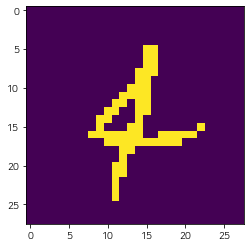

In [50]:
plt.imshow(np.array(test["X"][300]).reshape(28, 28))

In [ ]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>
"""

In [51]:
#### 강사님 github에서 복붙하기
#### 손글씨 예측 프로그램 만들어보기

from IPython.display import HTML

HTML(input_form + Javascript)

In [ ]:
print(image)

In [ ]:
preds = model.predict([image])
preds

In [ ]:
#### 훈련시킨 모델을 파일로 만들어 개발자에게 공유. 그러면 개발자가 프로그램을 만든다.
#### 그렇기 때문에 우린 훈련 모델을 프로그램으로 만들어줘야한다.

## 4. 학습모델 파일로 저장하기

- serializable(데이터 직렬화 방식 : 한줄로 보낸다는 의미) : 더 안정적
    + pickle
    + joblib

In [52]:
import pickle

In [64]:
phone = {"tom" : "010-1111-1111", "길동" : "010-2222-2222"}
product = ["마우스", "키보드"]

obj = (phone, product)
obj

({'tom': '010-1111-1111', '길동': '010-2222-2222'}, ['마우스', '키보드'])

In [65]:
f = open("data/obj1.pickle", "wb") #2진수로 저장하기 위해 wb 형식으로
pickle.dump(obj, f)

f.close

<function BufferedWriter.close>

In [66]:
f = open("data/obj1.pickle", "rb")
obj2 = pickle.load(f)
obj2

EOFError: Ran out of input

In [62]:
#### 학습된 데이터 모델 저장

iris = load_iris()
X, y = iris.data, iris.target

clf = LogisticRegression(random_state=0, max_iter=100000)
clf.fit(X, y)

LogisticRegression(max_iter=100000, random_state=0)

In [63]:
f = open("data/iris_logistic.pickle", "wb") #2진수로 저장하기 위해 wb 형식으로
pickle.dump(clf, f)

f.close

<function BufferedWriter.close>

In [68]:
f = open("data/iris_logistic.pickle", "rb")
clf2 = pickle.load(f)

print(clf2.predict(X))
f.close

EOFError: Ran out of input

In [69]:
import joblib

In [70]:
joblib.dump(clf, "data/iris_logestic.pkl")

['data/iris_logestic.pkl']

In [71]:
clf3 = joblib.load("data/iris_logestic.pkl")

In [72]:
print(clf3.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
